In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
import seaborn as sea

In [3]:
county_df = pd.read_csv('data/Processed_Data(Interpolated)')
county_df

,Date,County,median_price,avg_value,CPI,adj_median_price,adj_avg_value
0,2008-02-02,Los Angeles,450000.000000,415114.267851,212.713241,211552.415394,195152.057841
1,2008-02-09,Los Angeles,460000.000000,415114.267851,212.896931,216066.994374,194983.678644
2,2008-02-16,Los Angeles,474000.000000,415114.267851,213.080621,222451.013361,194815.589756
3,2008-02-23,Los Angeles,482000.000000,415114.267851,213.264310,226010.624666,194647.790425
4,2008-03-01,Los Angeles,460000.000000,409234.159417,213.448000,215509.163824,191725.459792
...,...,...,...,...,...,...,...
6683,2024-01-06,Merced,701285.714286,289806.009213,309.905806,226289.956395,93514.223735
6684,2024-01-13,Merced,720142.857143,289806.009213,310.214935,232143.193241,93421.036857
6685,2024-01-20,Merced,696377.142857,289806.009213,310.524065,224258.671850,93328.035515
6686,2024-01-27,Merced,671642.857143,289806.009213,310.833194,216078.228157,93235.219156


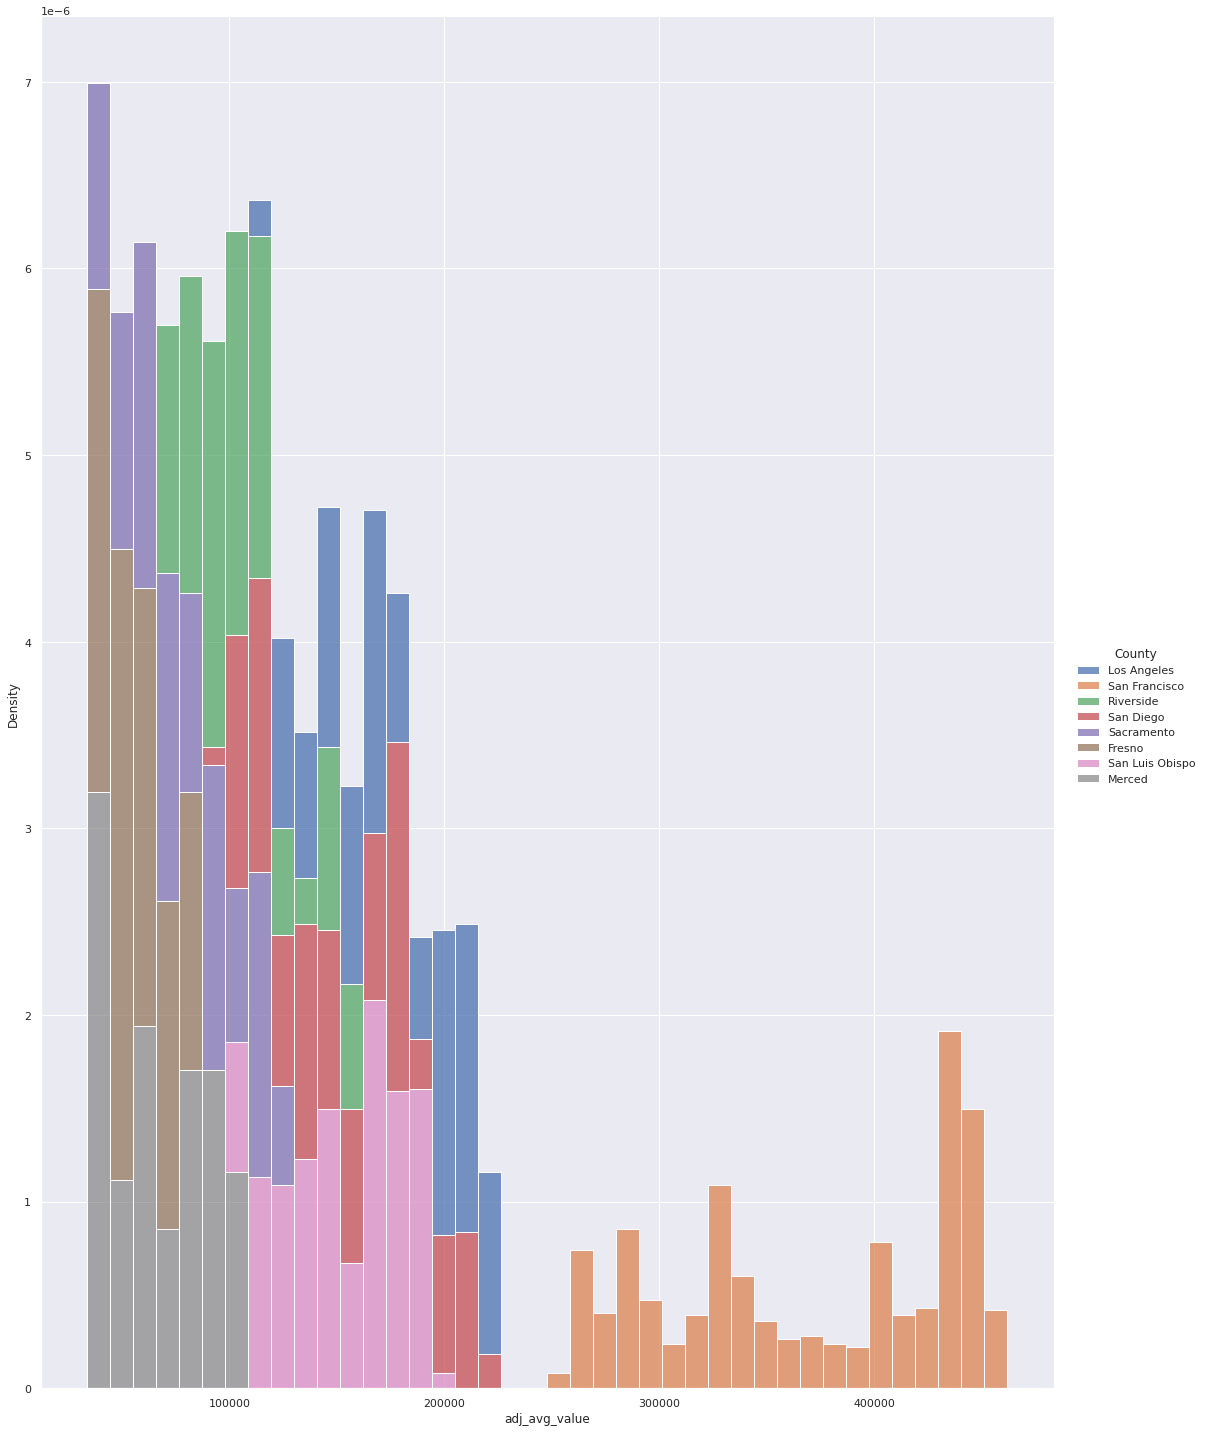

In [4]:
sea.set_theme()
sea.displot(county_df,x='adj_avg_value',hue='County',stat = 'density', height = 20, aspect = .75, multiple = 'stack')

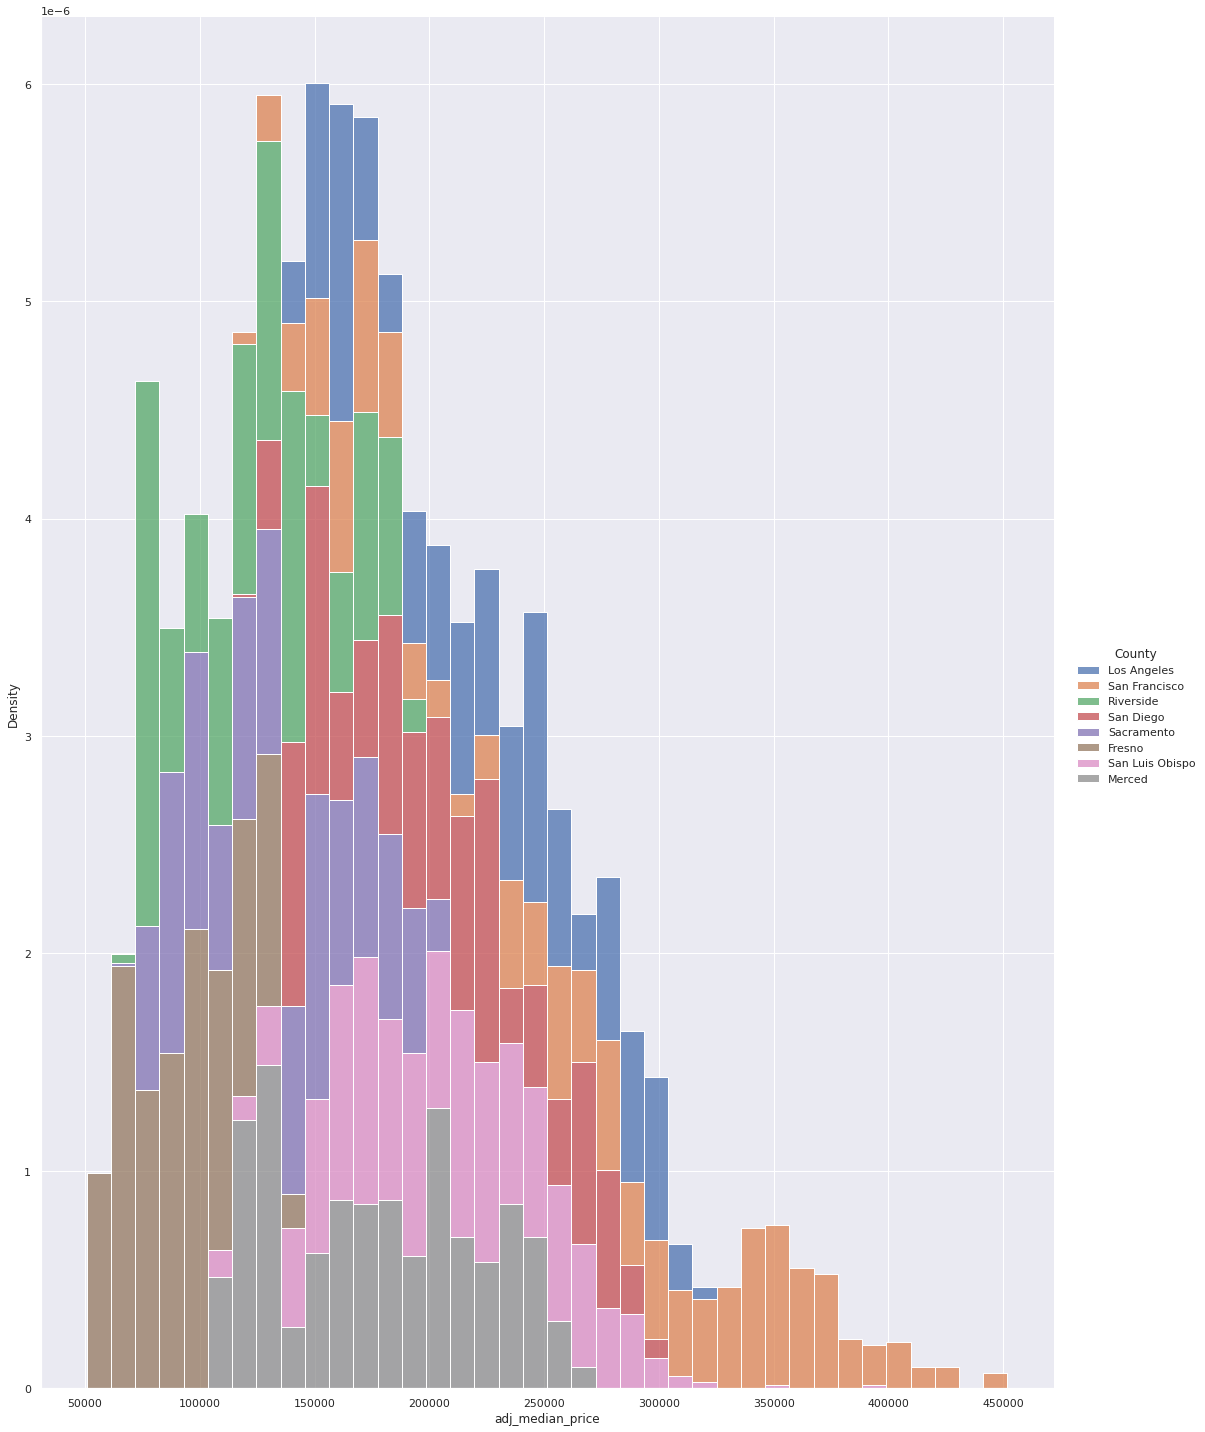

In [5]:
sea.displot(county_df,x='adj_median_price',hue='County',stat = 'density', height = 20, aspect = .75, multiple = 'stack')

<Axes: xlabel='County', ylabel='adj_median_price'>

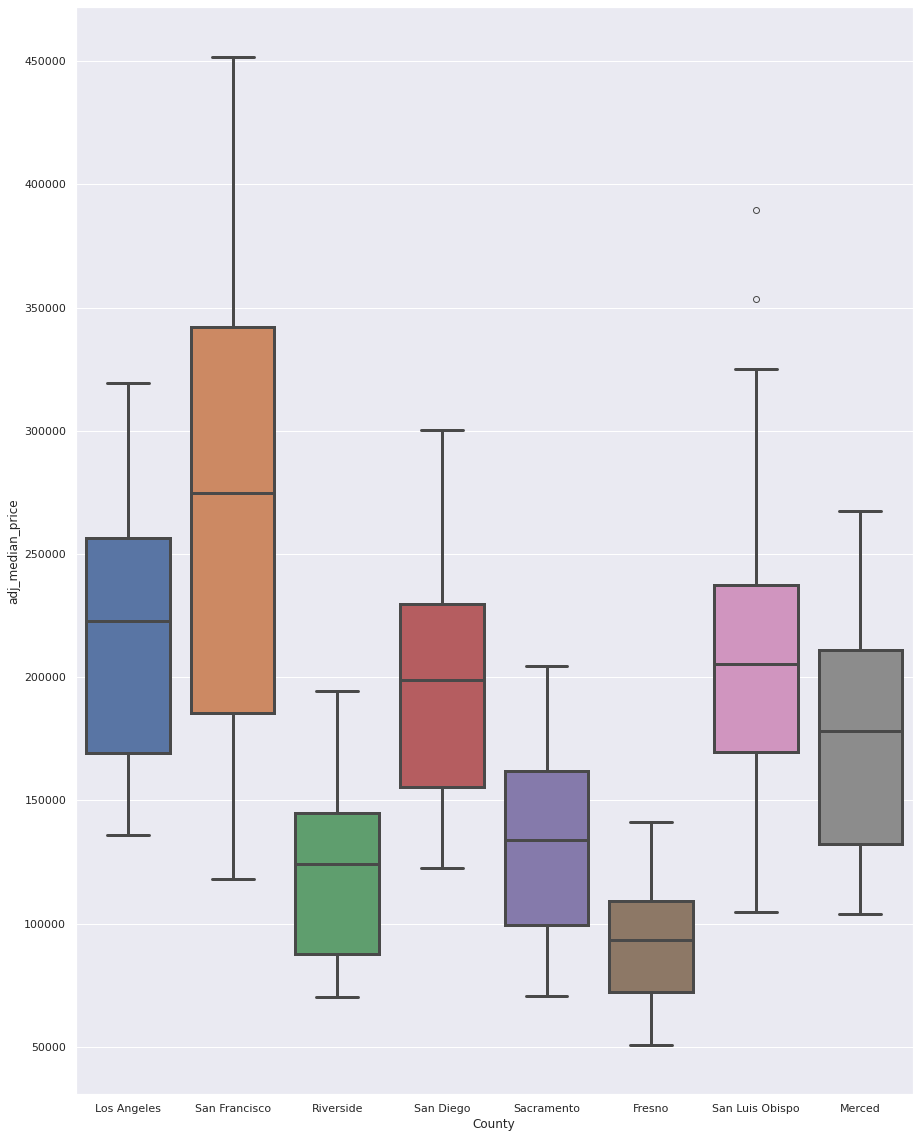

In [6]:
fig, ax = plt.subplots(figsize=(15, 20))
sea.boxplot(data = county_df, x ='County', y ='adj_median_price', ax=ax,
           linewidth = 3, hue='County')

<Axes: xlabel='County', ylabel='adj_avg_value'>

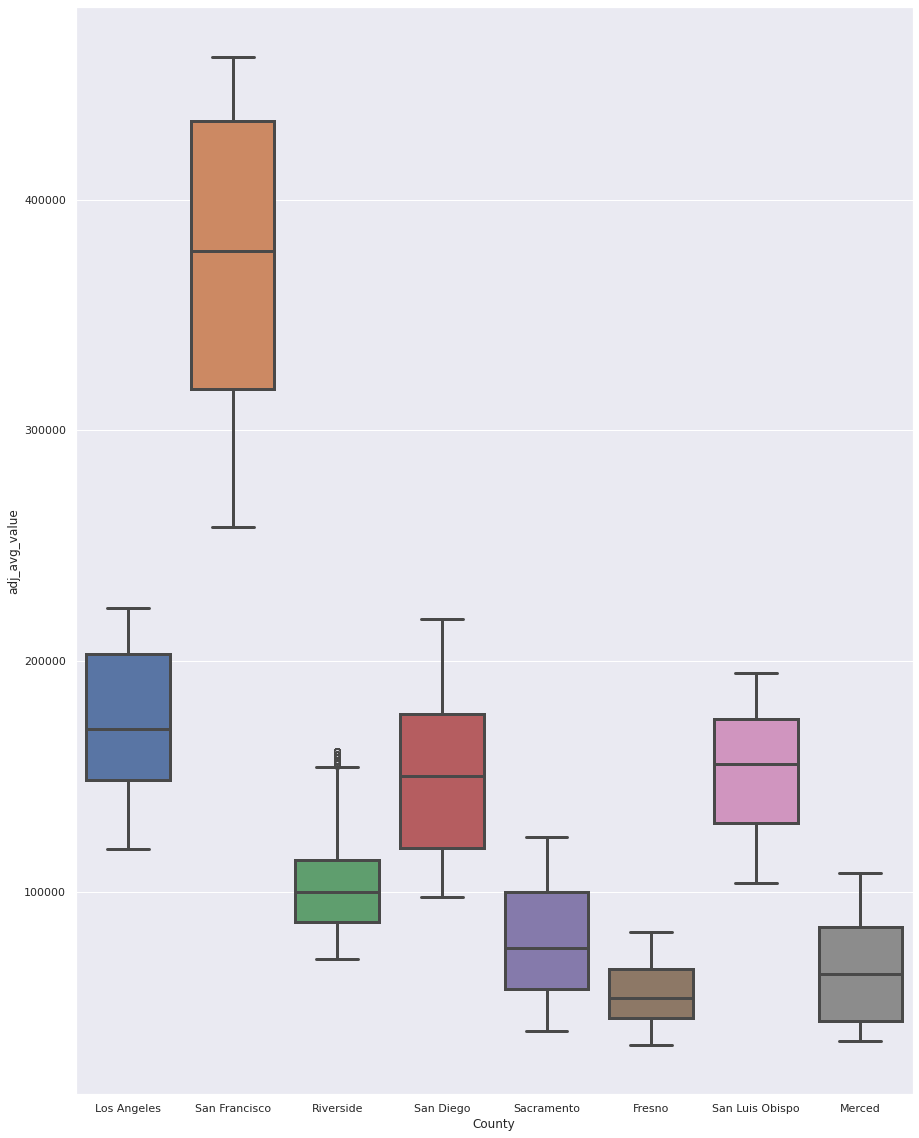

In [7]:
fig, ax = plt.subplots(figsize=(15, 20))
sea.boxplot(data = county_df, x ='County', y ='adj_avg_value', ax=ax,
           linewidth = 3, hue='County')

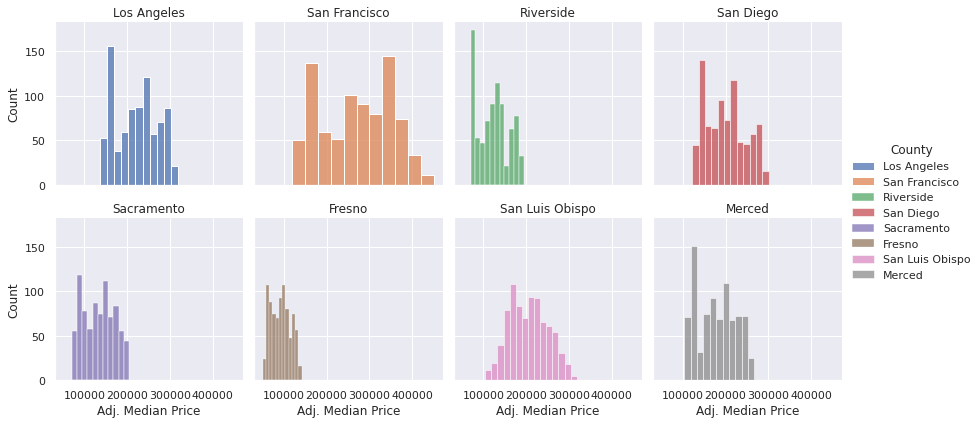

In [8]:
p = sea.FacetGrid(county_df, col='County', hue ='County', height=3, aspect = 1, col_wrap = 4,margin_titles=True)
p.map_dataframe(sea.histplot, 'adj_median_price')
p.add_legend()
p.set_axis_labels('Adj. Median Price')
p.set_titles(col_template="{col_name}")

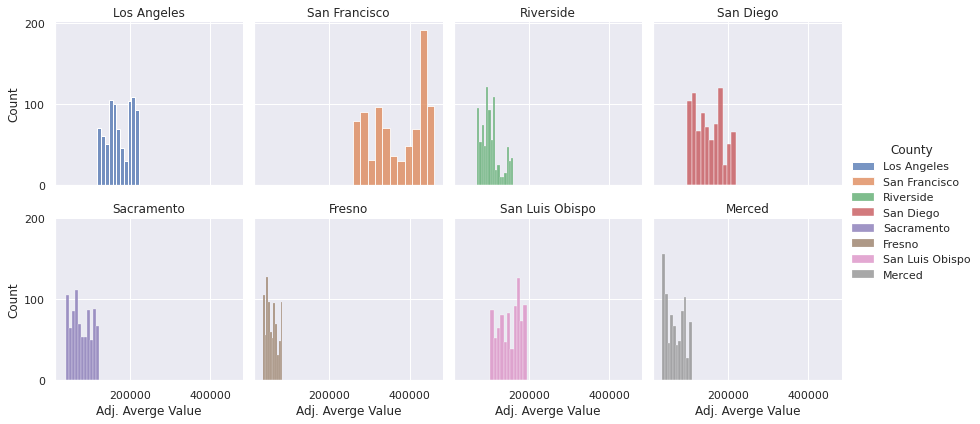

In [9]:
p = sea.FacetGrid(county_df, col='County', hue ='County', height=3, aspect = 1, col_wrap = 4,margin_titles=True)
p.map_dataframe(sea.histplot, 'adj_avg_value')
p.add_legend()
p.set_axis_labels('Adj. Averge Value')
p.set_titles(col_template="{col_name}")
sea.set_context('poster')

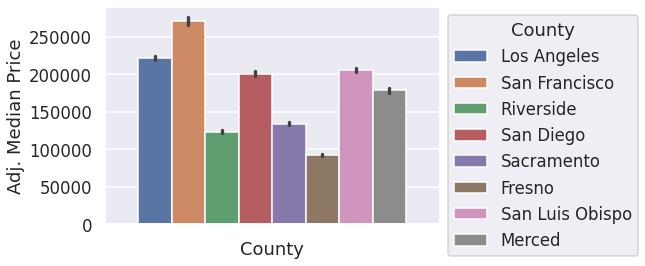

In [10]:
sea.set_context('talk')
b = sea.barplot(county_df,y='adj_median_price',hue='County')
b.set(xlabel='County',ylabel='Adj. Median Price')
sea.move_legend(b, "upper left", bbox_to_anchor=(1,1))

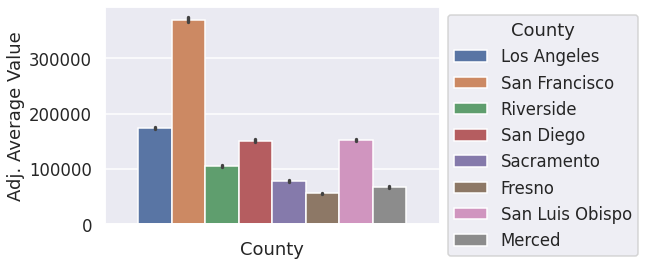

In [11]:
p = sea.barplot(county_df,y='adj_avg_value',hue='County')
p.set(xlabel='County',ylabel='Adj. Average Value')
sea.move_legend(p, "upper left", bbox_to_anchor=(1,1))

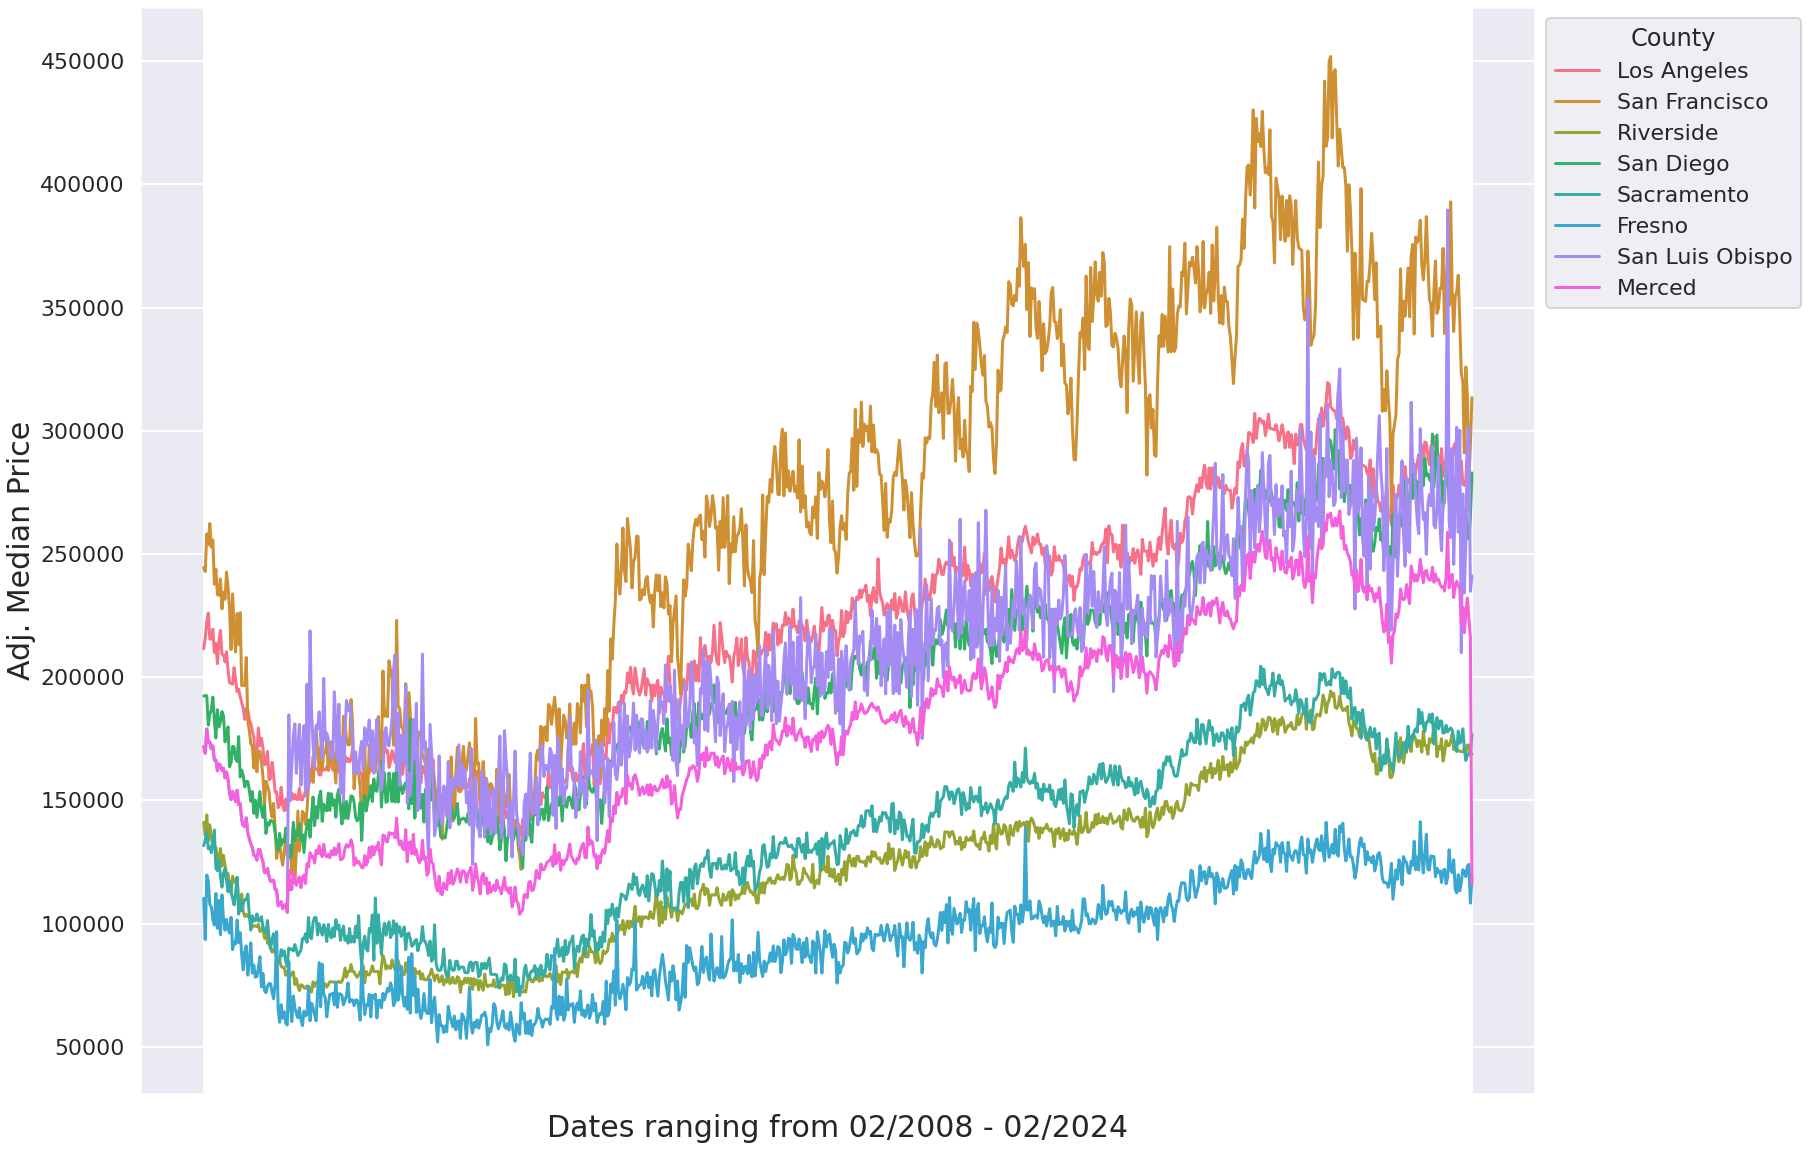

In [12]:
sea.set_context('poster')

fig, ax = plt.subplots(figsize=(25, 20))
median_lines = sea.lineplot(county_df,x='Date',y='adj_median_price',
                            hue='County', palette = sea.color_palette("husl", 8))
median_lines.set(xticklabels=[])
median_lines.set_xlabel("Dates ranging from 02/2008 - 02/2024",fontsize=30)
median_lines.set_ylabel('Adj. Median Price', fontsize=30)
sea.move_legend(median_lines, "upper left", bbox_to_anchor=(1,1))

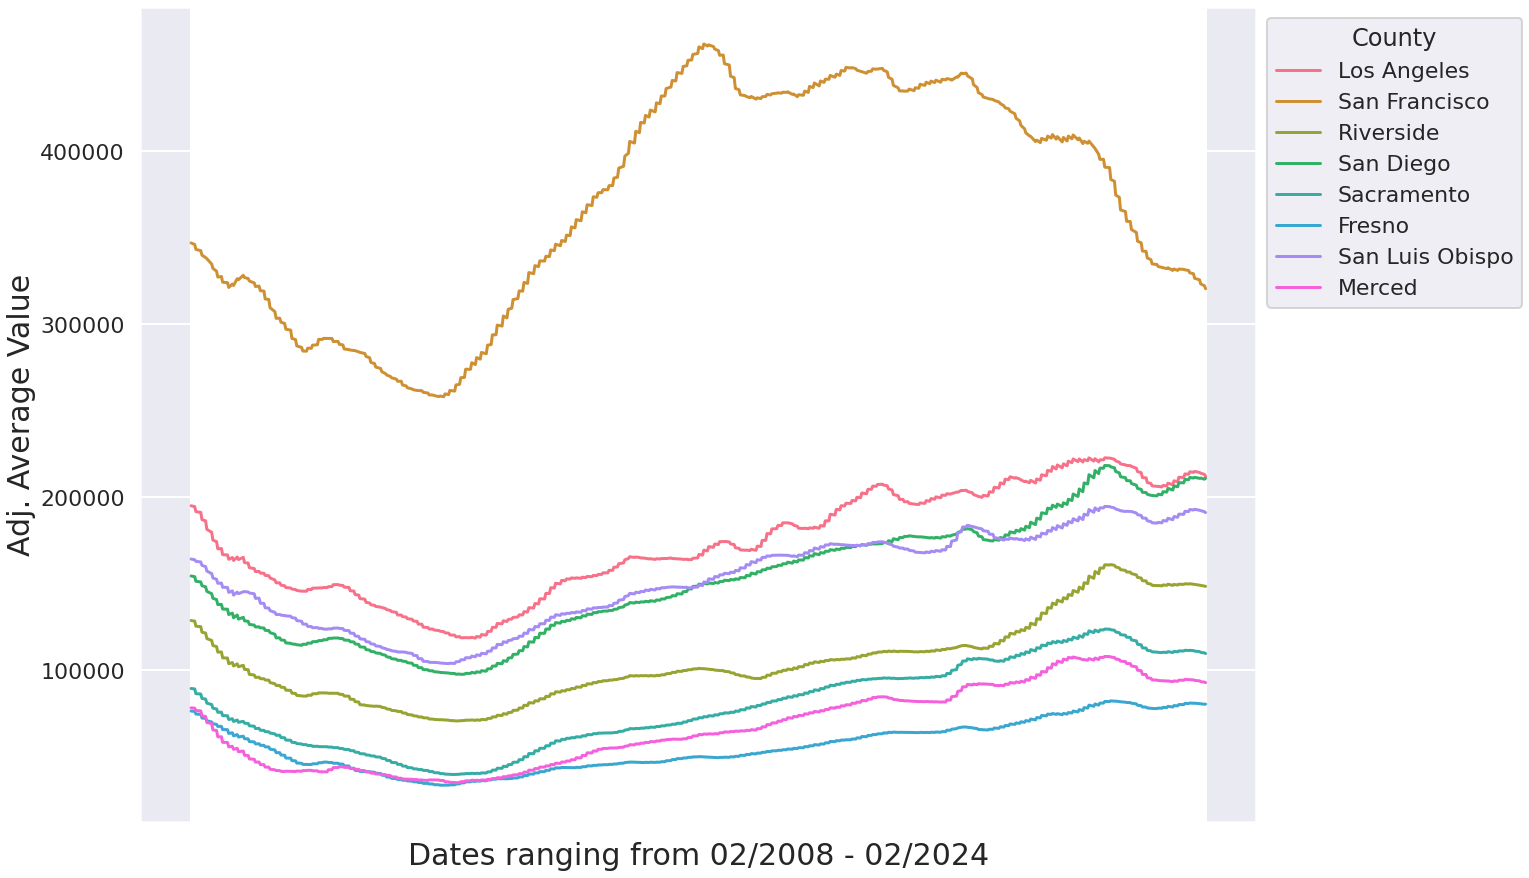

In [13]:
sea.set_context('poster')

fig, ax = plt.subplots(figsize=(20, 15))
median_lines = sea.lineplot(county_df,x='Date',y='adj_avg_value',
                            hue='County', palette = sea.color_palette("husl", 8))
median_lines.set(xticklabels=[])
median_lines.set_xlabel("Dates ranging from 02/2008 - 02/2024",fontsize=30)
median_lines.set_ylabel('Adj. Average Value', fontsize=30)
sea.move_legend(median_lines, "upper left", bbox_to_anchor=(1,1))

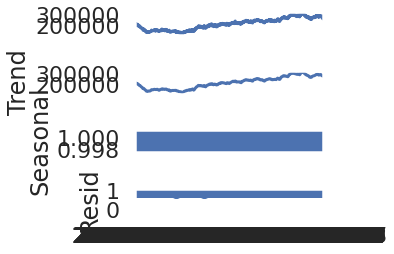

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose


analysis = county_df[county_df['County']=='Los Angeles'].copy()
del analysis['median_price']
del analysis['avg_value']
del analysis['CPI']
del analysis['adj_avg_value']
del analysis['County']
analysis.set_index('Date',inplace=True)

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative",period=4)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();